In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people, load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.manifold import TSNE

#### NMF
- 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘
- pca와 비슷하고 차원 축소에 사용할 수 있으며 똑같이 성분의 가중치 합으로 데이터 포인트를 나타낼 수 있다.
- 하지만 PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾지만 NMF에서는 음수가 아닌 성분과 계수 값을 찾는다
- 즉 주성분과 계수가 모두 0보다 크거나 같아야 한다. 따라서 음수가 아닌 특성을 가진 데이터에만 적용 가능하다.

- 대표적으로는 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악에 사용하여 원본 성분을 구분한다.
- 음스로 된 성분이나 계수가 만드는 상쇄효과를 이해하기 어려운 PCA보다 NMF의 주성분이 해석하기 쉽다.

c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


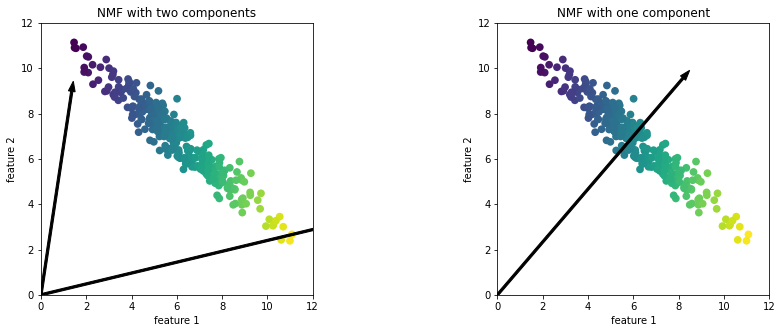

In [2]:
mglearn.plots.plot_nmf_illustration()

- 왼쪽은 성분이 둘인 NMF로 두 개의 성분으로 모든 포인트 표현 가능

- 데이터를 완벽하게 재구성할 수 있을 만큼 성분이 아주 많다면 알고리즘은 각 특성 끝에 위치한 포인트를 가리키는 방향을 선택
- 하나의 성분만 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만든다.
- pca와 반대로 성분 개수를 줄이면 특정 방향이 제거되고 전체 성분이 완전히 바뀐다.
- 정렬되어 있지도 않아 모든 성분을 동등하게 취급
- 무작위로 초기화하기 떄문에 난수 생성 초깃값에 따라 결과가 달라진다.

In [ ]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool_)
image_shape = people.images[0].shape

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


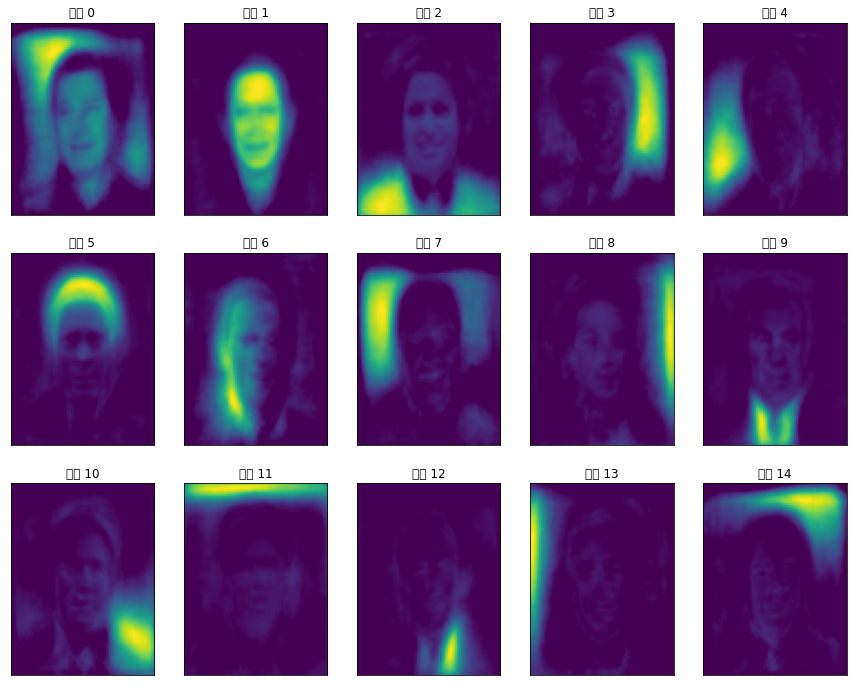

In [11]:
nmf = NMF(n_components=15, random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks' : (), 'yticks' : ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('성분 {}'.format(i))

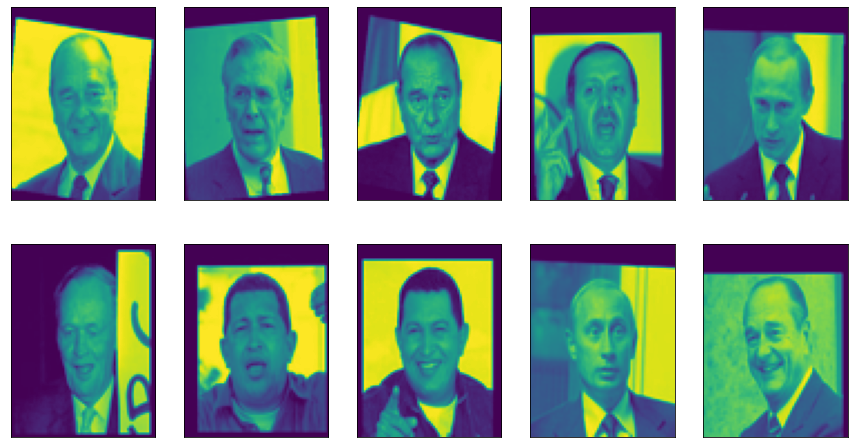

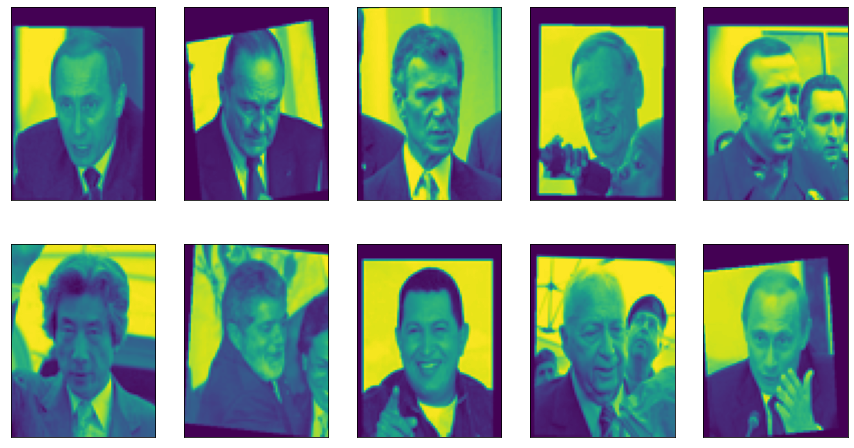

In [12]:
compn = 3
# 4번째 성분으로 정렬하여 성분들이 강하게 나타난 이미지 10개 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks' : (), 'yticks' : ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# 8번째 성분으로 정렬하여 성분들이 강하게 나타난 이미지 10개 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks' : (), 'yticks' : ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


Text(0, 0.5, 'signal')

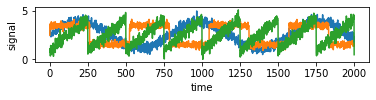

In [13]:
# 세 개의 서로 다른 입력으로부터 합성된 신호

S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('time')
plt.ylabel('signal')

In [14]:
# 원본 데이터를 사용해 100개의 측정 데이터 생성
A =  np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('측정 데이터 형태 :', X.shape)

측정 데이터 형태 : (2000, 100)


In [15]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print('복원한 신호 데이터 형태 :', S_.shape)

복원한 신호 데이터 형태 : (2000, 3)


In [18]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

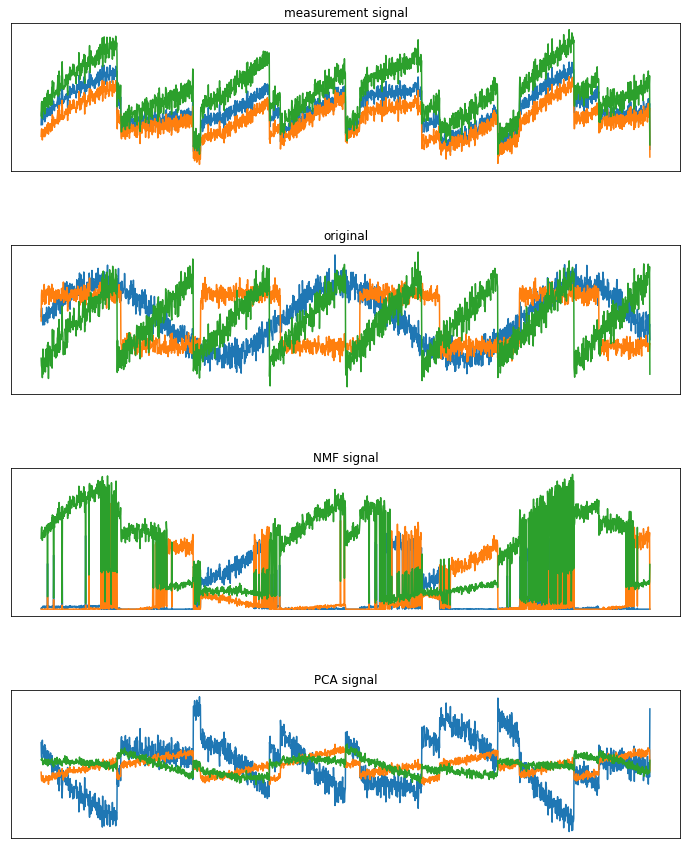

In [20]:
models = [X, S, S_, H]
names = ['measurement signal', 'original', 'NMF signal', 'PCA signal']

fig, axes = plt.subplots(4, figsize=(12, 15), gridspec_kw={'hspace' : .5}, subplot_kw={'xticks' : (), 'yticks' : ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

- 패턴 추출에 대해서는 추가적으로 독립 성분 분석(ICA), 요인 분석(FA), 희소 코딩을 scikit에서 확인할 수 있다.

#### t-SNE를 이용한 매니폴드 학습

- 산점도로 시각화 가능하다는 이점으로 PCA를 많이 시도하지만 알고리즘의 (회전하고 방향 제거) 태생상 유용성이 떨어진다.
- 매니폴드 학습 알고리즘이라는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들어 더 나은 시각화 제공. 그 중에서 t-SNE 많이 사용
- t-SNE 포함 일부 매니폴드 알고리즘은 훈련 데이터를 새로운 표현으로 변환하지만 새로운 데이터에 적용불가

- 따라서 테스트 세트에 사용 불가. 훈련 세트에만 사용
- t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것.
- 멀리 떨어진 포인트와의 거리 보존보다 가까이 있는 포인트에 더 많은 비중을 둔다.

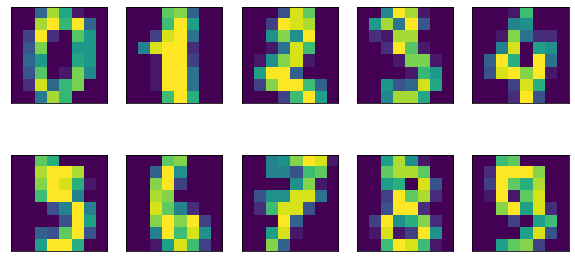

In [3]:
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                        subplot_kw={'xticks' : (), 'yticks' : ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

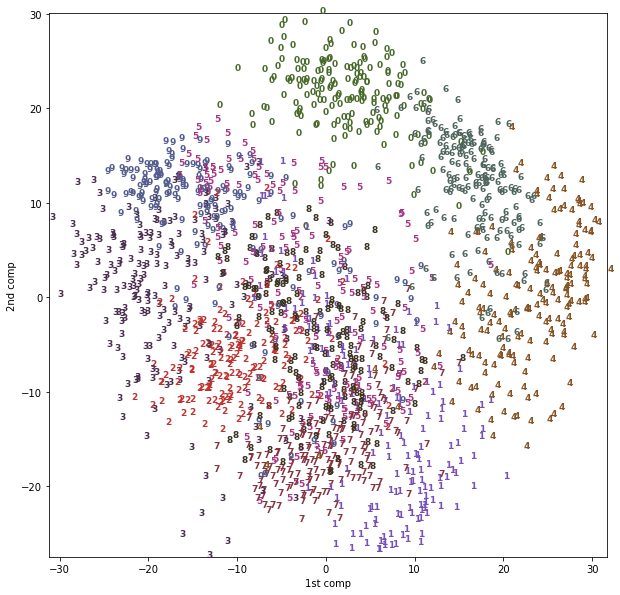

In [9]:
digits = load_digits()

pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 2개의 주성분으로 데이터 변환
digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})

plt.xlabel("1st comp")
plt.ylabel("2nd comp")
plt.show()


c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


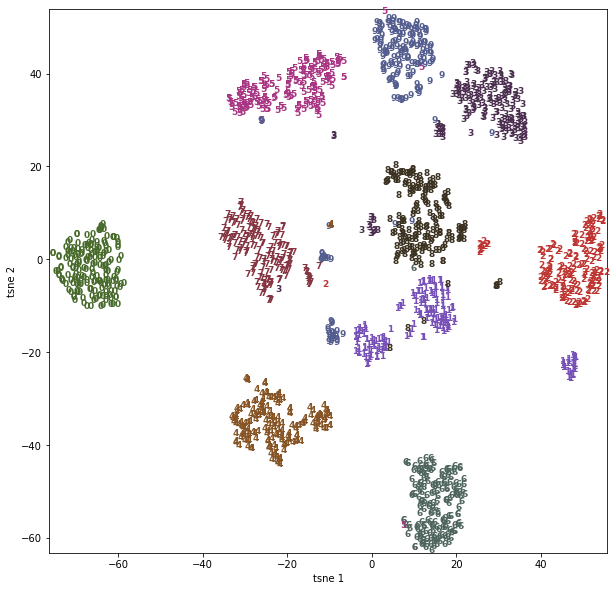

In [10]:
tsne = TSNE(random_state=42)

digits = load_digits()
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})

plt.xlabel("tsne 1")
plt.ylabel("tsne 2")
plt.show()

- TSNE 모델에는 새 데이터 변환 기능을 제공하지 않아 transform 메서드가 없다.

- 클래스 레이블 정보를 사용하지 않으므로 완전한 비지도 학습
- t-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많다.
- perplexity와 early_exaggeration을 변경해볼 수 있지만, 영향은 크지 않다.